# Customer Segmentation - K-Mean Clustering

So often we want to explore customer data for market segmentation. 

Market segmentation is very useful on target marketing, promotion etc. 

This is a small dataset to demontrate unsupervised machine learning on customer segmentation.

Unsupervised machine learning do not have a reponse label. The goal of unsupervised machine learning is to find pattern in the dataset. 


In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (8, 6)

In [3]:
# This is a small mall customer dataset for customer clustering project.  
# Load Data Set

data = pd.read_csv('Mall_Customers.csv')
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.shape

(200, 5)

This dataset contains 200 observations with 5 variables:

    1) Customer ID
    2) Gender
    3) Age
    4) Annual Income in thousand
    5) Spending score keeping track by the mall

In [20]:
# Select independent variables

X = data.iloc[:, [3, 4]].values

# We do not define the dependent variable here because we do not know exactly
# what we looking for. Therefore, no target variable. 

In [21]:
print (X.shape)


(200, 2)


#### Using the WCSS elbow method to find the optinal number of clusters

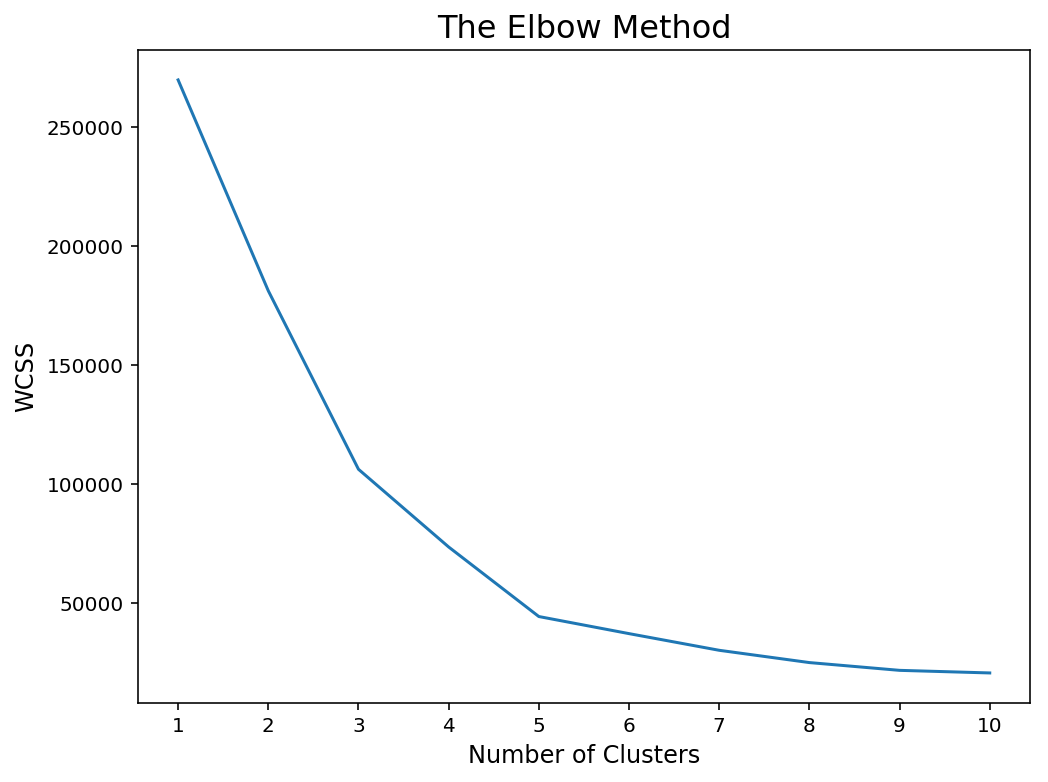

In [22]:
# Using the WCSS elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
# Since we need to look at the results of inertia, we will create a for loop to get the sum of squres results.
# create a empty wcss list
wcss = []

# loop through the calculations. 
for i in range(1, 11):
    # first we have to create the KMean object and fit the data
    # We use k-means++ instead of random to void cluster trap
    # max_iter is numbers of iteration Kmean will run to find the optimal number of clusters
    # n_init is number of centriod combinations
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# plot the wcss graph to find the optimal number of cluster
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 16)
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('WCSS', fontsize = 12)
plt.xticks(np.arange(1, 11, 1))
plt.show()


**The WCSS shows 5 is the optimal number of cluster in this dataset.**

**Now we can apply the number of clusters to the model**

In [23]:
# Applying k-means to the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Use the fit_predict method to returns each observation which cluster it belongs.
# The result will be a vector, which are the labels of cluster called y_kmean.

y_kmeans = kmeans.fit_predict(X)

# Look at the first 10 observations' assigned clustered.
y_kmeans[:10]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3], dtype=int32)

---

### Visualize the clusters

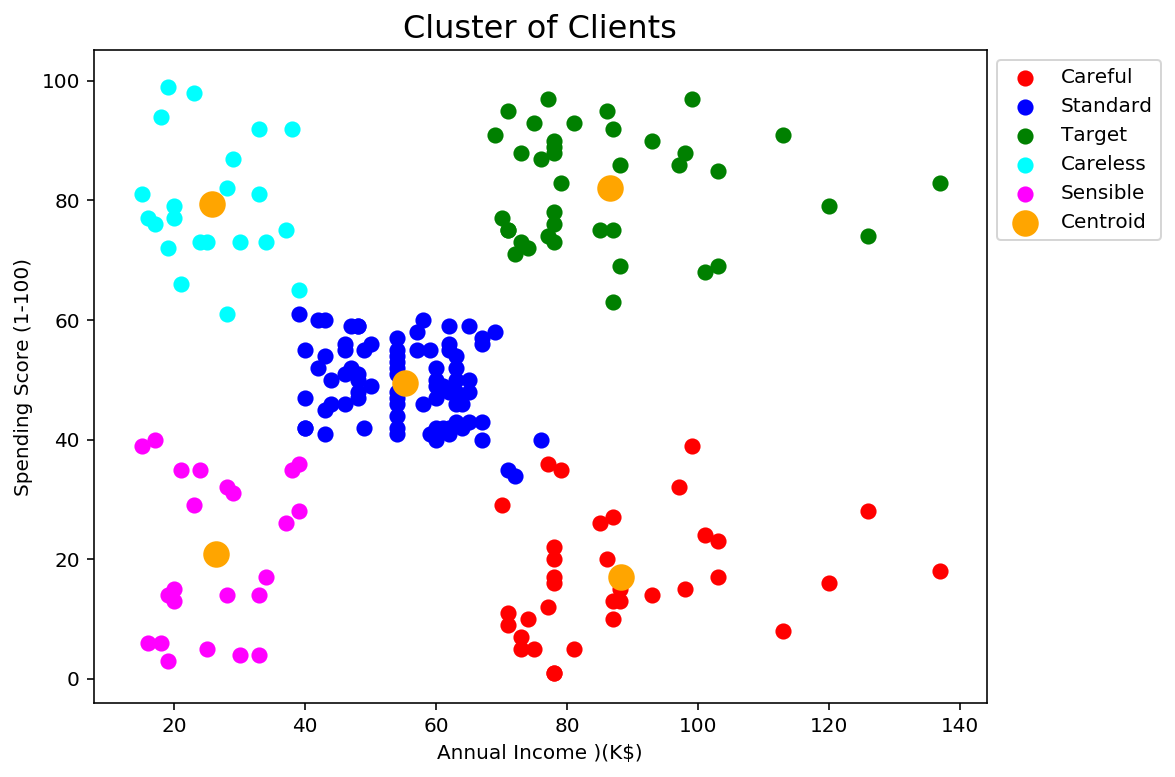

In [24]:
# Make a scatter plot of the clusters of obserations with centroids

# Plot the dataset X 
# x-axis = all the y_kmeans category 0 corresponded to column 0(Annual Income) of the X dataset
# y-axis = all the y_kmeans category 0 corresponded to column 1(spending Score) of the X dataset
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Sensible')

# Plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 150,
            c = 'orange',
            label = 'Centroid')
plt.title('Cluster of Clients', fontsize = 16)
plt.xlabel('Annual Income )(K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor = (1,1) )
plt.grid(False)
plt.show()

### Conclusion:

The clustering shows 5 segments.

    1) The careful spender in red - These customers have high annual income and spend their money carefully.
    2) The standard spender in blue - These customers spend according to their income level. 
    3) The target spender in green - These customers are the customers we wish to target because they have high income and also willing to spend.
    4) The careless spenders in blue - These customers tends to spend more than they make. 
    5) The sensible spenders in magetta - These customers have low income and do not spend much either. 
    